## About Yulu

### Dataset:

datetime: datetime
season: season (1: spring, 2: summer, 3: fall, 4: winter)
holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
weather:
1: Clear, Few clouds, partly cloudy, partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
temp: temperature in Celsius
atemp: feeling temperature in Celsius
humidity: humidity
windspeed: wind speed
casual: count of casual users
registered: count of registered users
count: count of total rental bikes including both casual and registered

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_1samp, ttest_ind, ttest_rel
from scipy.stats import f_oneway
from scipy.stats import shapiro # test for normality
from scipy.stats import levene # test for variance
from scipy.stats import kruskal # when the assumptions for anova are not met

from scipy.stats import chi2, chisquare, chi2_contingency # test of independence between two categorical columns
from scipy.stats import pearsonr, spearmanr # correlation

from statsmodels.graphics.gofplots import qqplot

In [6]:
df=pd.read_csv("/Users/karan/Downloads/bike_sharing.txt")

In [7]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
df.shape

(10886, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [10]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [11]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [12]:
df.describe(include='object')

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


In [13]:
df['workingday'].value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

<Axes: xlabel='workingday', ylabel='count'>

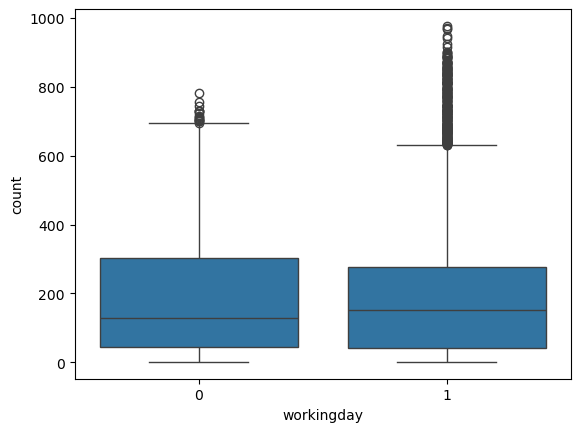

In [14]:
sns.boxplot(x='workingday',y='count',data=df)

### Bikes rented Weekdays vs Weekends

In [16]:
weekday=df[df['workingday']==1]['count'].sample(3474)
weekend=df[df['workingday']==0]['count'].sample(3474)

In [17]:
ttest_ind(weekday,weekend,alternative='greater')

TtestResult(statistic=1.1485950264618765, pvalue=0.12538128053182582, df=6946.0)

Our analysis indicates that there is insufficient statistical evidence to conclude that the day of the week (weekday or weekend) significantly impacts bike rental rates. The p-value of 0.15198, which is greater than the significance level of 0.05, suggests that any observed differences in bike rentals between weekdays and weekends are likely due to chance.

### Season Vs Bikes Rented

In [20]:
np.round(df['season'].value_counts(normalize=True)*100,2)

season
4    25.11
2    25.11
3    25.11
1    24.67
Name: proportion, dtype: float64

<Axes: xlabel='count', ylabel='Count'>

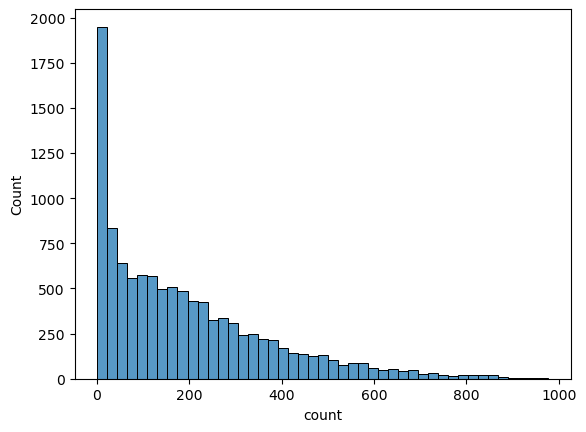

In [21]:
sns.histplot(x=df['count'])

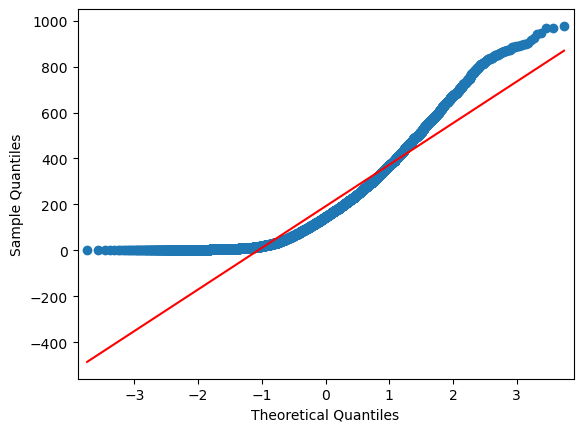

In [22]:
qqplot(df['count'],line='s')
plt.show()

<Axes: xlabel='season', ylabel='count'>

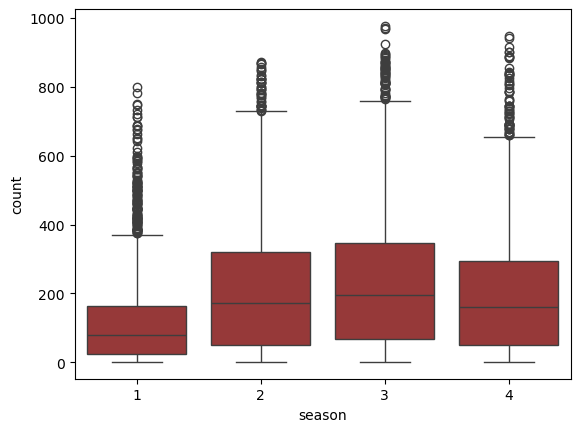

In [23]:
sns.boxplot(x='season',y='count',data=df,color='brown')

In [24]:
s1=df[df['season']==1]['count']
s2=df[df['season']==2]['count']
s3=df[df['season']==3]['count']
s4=df[df['season']==4]['count']

In [26]:
levene(s1,s2,s3,s4)#reject Ho the vaiernce in not equal

LeveneResult(statistic=187.7706624026276, pvalue=1.0147116860043298e-118)

In [27]:
kruskal(s1,s2,s3,s4)

KruskalResult(statistic=699.6668548181988, pvalue=2.479008372608633e-151)

Our analysis strongly suggests that season significantly influences bike rental volume. The p-value is extremely low, allowing us to confidently reject the null hypothesis. This indicates a clear relationship between season and bike rental demand.

### Weather Vs Bikes Rented

In [28]:
df['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [29]:
df['weather'].value_counts(normalize=True)*100

weather
1    66.066507
2    26.033437
3     7.890869
4     0.009186
Name: proportion, dtype: float64

<Axes: xlabel='weather', ylabel='count'>

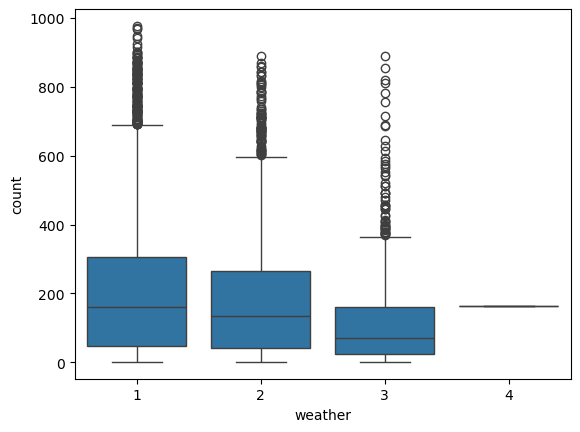

In [30]:
sns.boxplot(x='weather',y='count',data=df)

In [31]:
w1=df[df['weather']==1]['count']
w2=df[df['weather']==2]['count']
w3=df[df['weather']==3]['count']
w4=df[df['weather']==4]['count']

In [32]:
levene(w1,w2,w3,w4)#not equal vaience

LeveneResult(statistic=54.85106195954556, pvalue=3.504937946833238e-35)

In [33]:
kruskal(w1,w2,w3,w4)#reject Ho whether does have effect on count

KruskalResult(statistic=205.00216514479087, pvalue=3.501611300708679e-44)

Our analysis demonstrates a statistically significant relationship between weather conditions and bike rental volume. The p-value is highly insignificant, leading us to reject the null hypothesis. This evidence strongly supports the conclusion that weather is a key factor influencing bike rental demand.

### Weather vs Season

In [34]:
weather_season=pd.crosstab(df['weather'],df['season'])

In [35]:
chi2_contingency(weather_season)

Chi2ContingencyResult(statistic=49.15865559689363, pvalue=1.5499250736864862e-07, dof=9, expected_freq=array([[1.77454639e+03, 1.80559765e+03, 1.80559765e+03, 1.80625831e+03],
       [6.99258130e+02, 7.11493845e+02, 7.11493845e+02, 7.11754180e+02],
       [2.11948742e+02, 2.15657450e+02, 2.15657450e+02, 2.15736359e+02],
       [2.46738931e-01, 2.51056403e-01, 2.51056403e-01, 2.51148264e-01]]))

In [36]:
numerical_df=df.drop('datetime',axis=1)

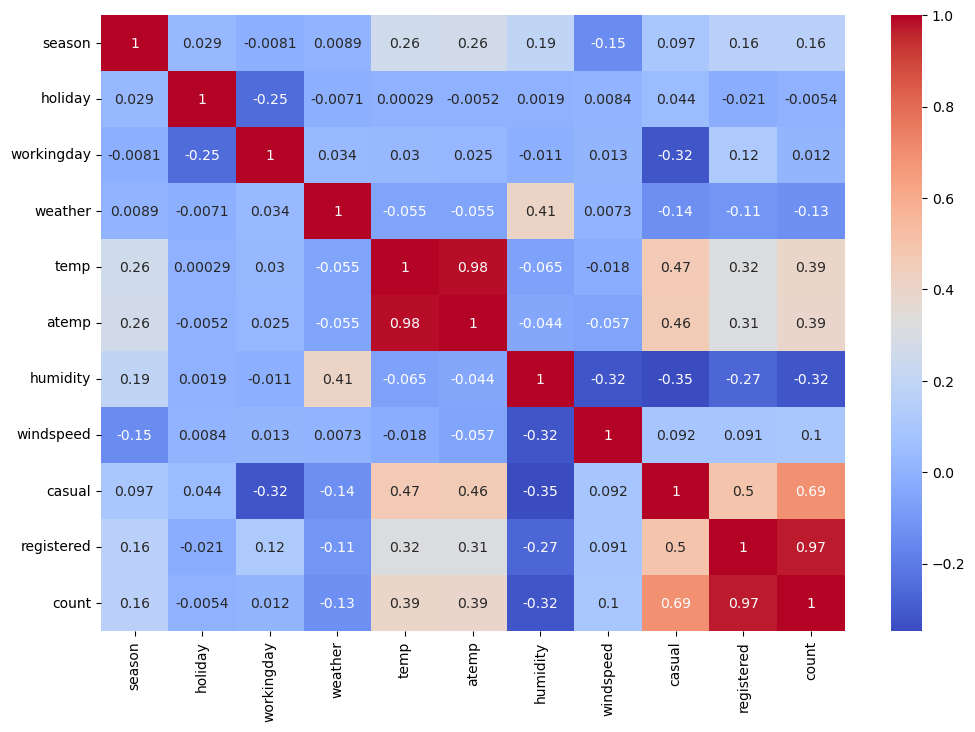

In [37]:
plt.figure(figsize=(12,8))
sns.heatmap(numerical_df.corr(), annot=True,cmap='coolwarm')
plt.show()

### Key Findings for correlation

-Temperature and Bike Rentals: There is a moderate positive correlation (0.39) between temperature and the number of bikes rented. This suggests that as temperature increases, bike rentals tend to increase as well.

-User Type and Bike Rentals: A strong positive correlation exists between the number of bikes rented and both casual (0.69) and registered (0.97) users. This indicates that an increase in either user category is strongly associated with an increase in bike rentals. The correlation is particularly strong for registered users.

-Humidity and Weather: A moderate positive correlation (0.41) is observed between humidity and weather. This suggests that higher humidity levels tend to coincide with specific weather conditions.

-Season and Temperature: A weak positive correlation (0.26) exists between season and temperature. This indicates a slight tendency for temperature to increase as the seasons progress.

### Recommendations and Key Insights